# -  Prepare a classification model using SVM for salary data 

- Data Description:

 - age -- age of a person
 - workclass	-- A work class is a grouping of work 
 - education	-- Education of an individuals	
 - maritalstatus -- Marital status of an individulas	
 - occupation	 -- occupation of an individuals
 - relationship -- 	
 - race --  Race of an Individual
 - sex --  Gender of an Individual
 - capitalgain --  profit received from the sale of an investment	
 - capitalloss	-- A decrease in the value of a capital asset
 - hoursperweek -- number of hours work per week	
 - native -- Native of an individual
 - Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.svm import SVC


In [2]:
salary_train=pd.read_csv(r"E:\assignments csv  files\SalaryData_Train(1).csv")

In [3]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
salary_test=pd.read_csv(r"E:\assignments csv  files\SalaryData_Test(1).csv")
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Conventionally, We perform EDA, visualisation and then split data into train and test. However, here we have train and test sets in first place only.. so we will merge them, perform EDA and visualisation.. and then again split data in order to apply ML algorithms.

In [9]:
# concating the train and test data

In [10]:
salary=salary_train.append(salary_test)
salary.reset_index(inplace=True)
salary=salary.drop('index',axis=1)
salary

C:\Users\hp\AppData\Local\Temp\ipykernel_13380\3370984880.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salary=salary_train.append(salary_test)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [11]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [12]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
salary.shape

(45221, 14)

In [14]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [15]:
salary.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [16]:
numerical_feature=[feature for feature in salary.columns if salary[feature].dtype!="O"]
numerical_feature

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [17]:
#under numeric features there are 2 types of features ie. discrete and categorical

discrete_features = [feature for feature in numerical_feature if len(salary[feature].unique())<25]
print('discrete features:', discrete_features, '\n')

continuous_features = [feature for feature in numerical_feature if feature not in discrete_features]
print('continuous features:', continuous_features, '\n')

discrete features: ['educationno'] 

continuous features: ['age', 'capitalgain', 'capitalloss', 'hoursperweek'] 



In [18]:
categorical_feature=[feature for feature in salary.columns if salary[feature].dtype=="O"]
print("categorical_feature",categorical_feature)

categorical_feature ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [19]:
for feature in categorical_feature:
    print(salary[feature].value_counts())

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64
 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales           

In [20]:
for feature in categorical_feature:
    print(feature,'has',len(salary[feature].unique()),'labels')

workclass has 7 labels
education has 16 labels
maritalstatus has 7 labels
occupation has 14 labels
relationship has 6 labels
race has 5 labels
sex has 2 labels
native has 40 labels
Salary has 2 labels


<Axes: >

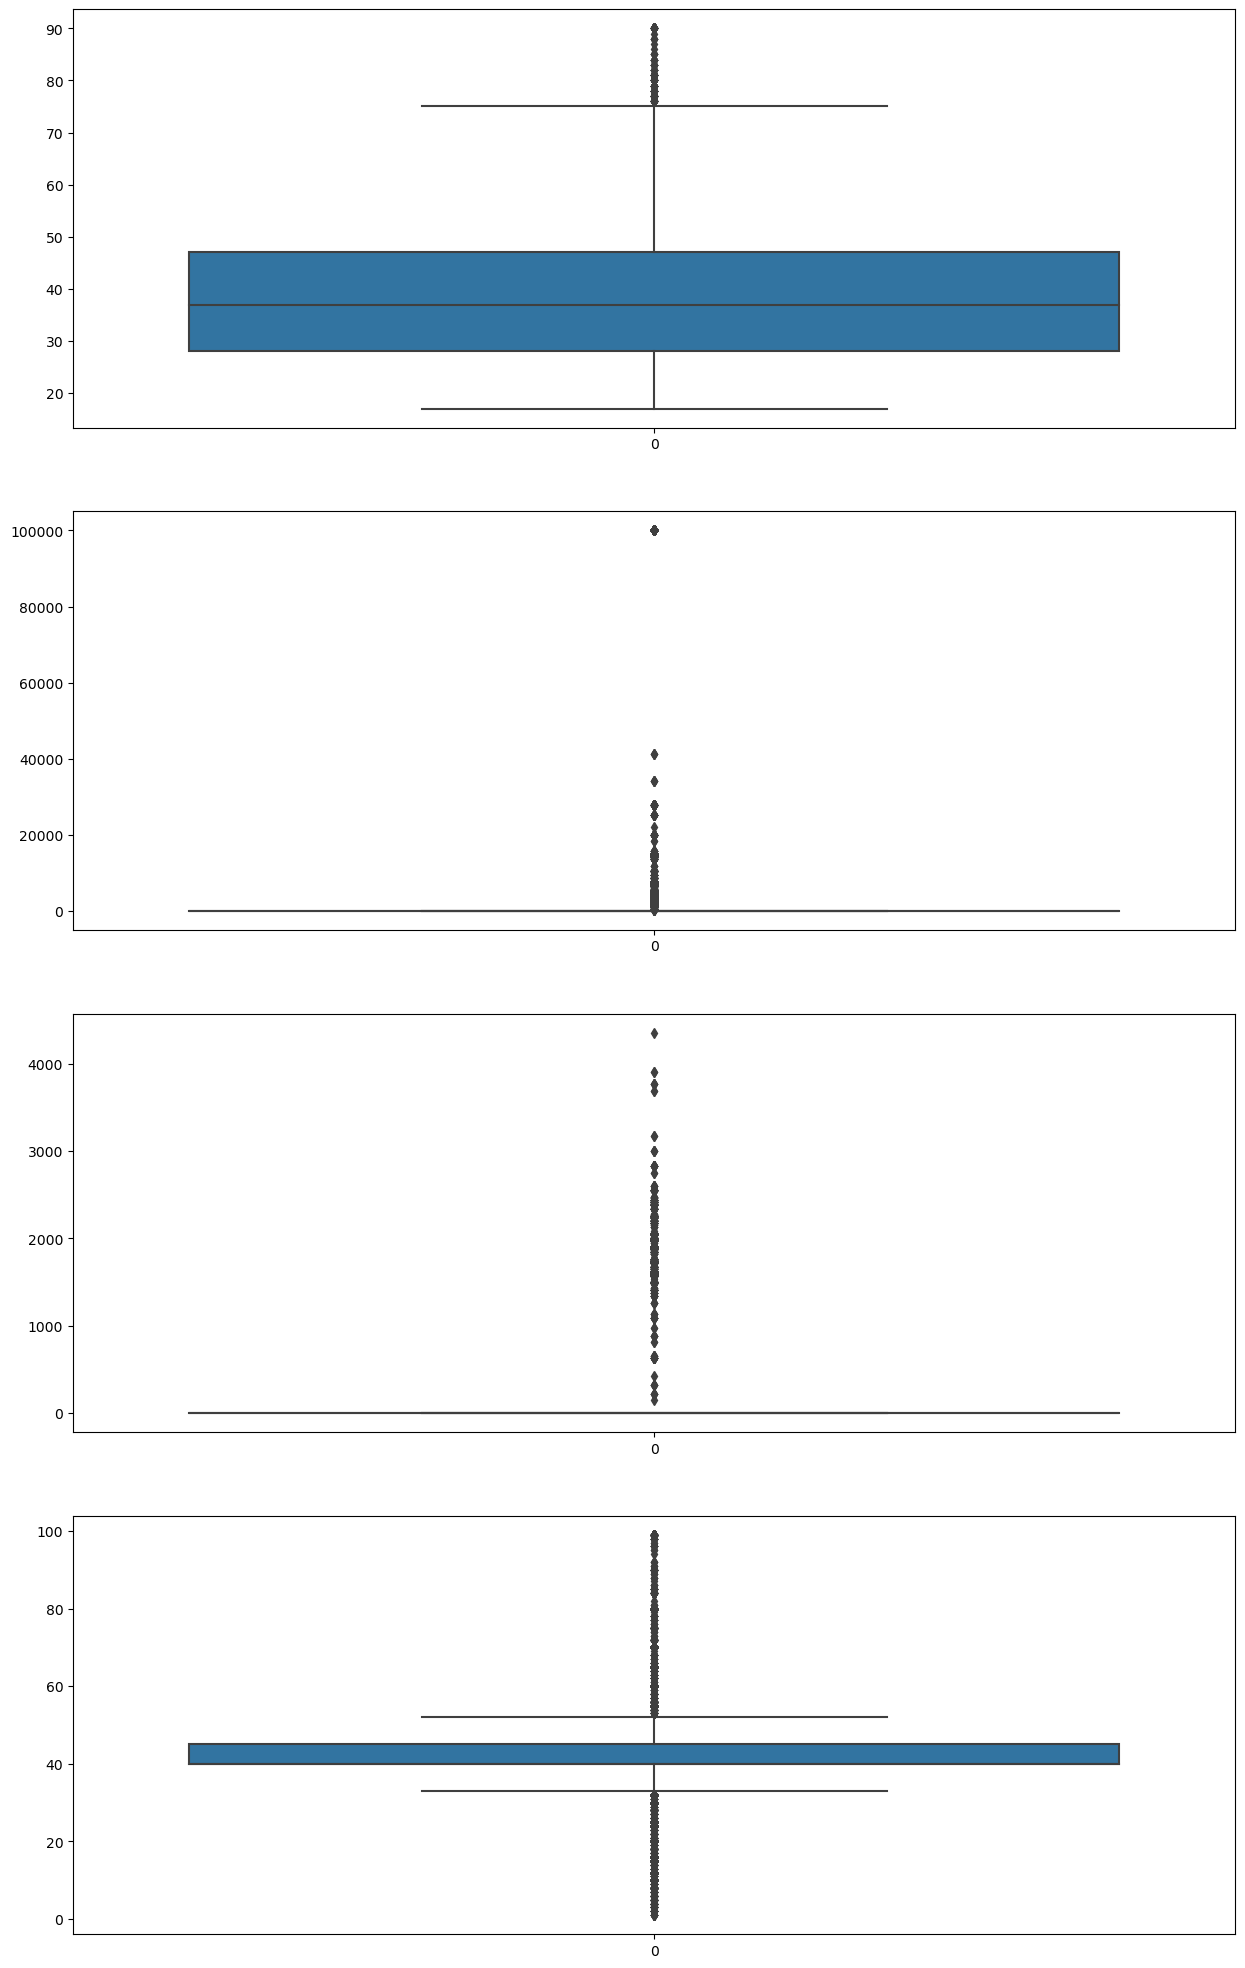

In [21]:
fig,ax=plt.subplots(4,1,figsize=(15,25))
sns.boxplot(salary.age,ax=ax[0])
sns.boxplot(salary.capitalgain,ax=ax[1])
sns.boxplot(salary.capitalloss,ax=ax[2])
sns.boxplot(salary.hoursperweek,ax=ax[3])

In [22]:
 #There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

In [23]:
categorical_feature

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

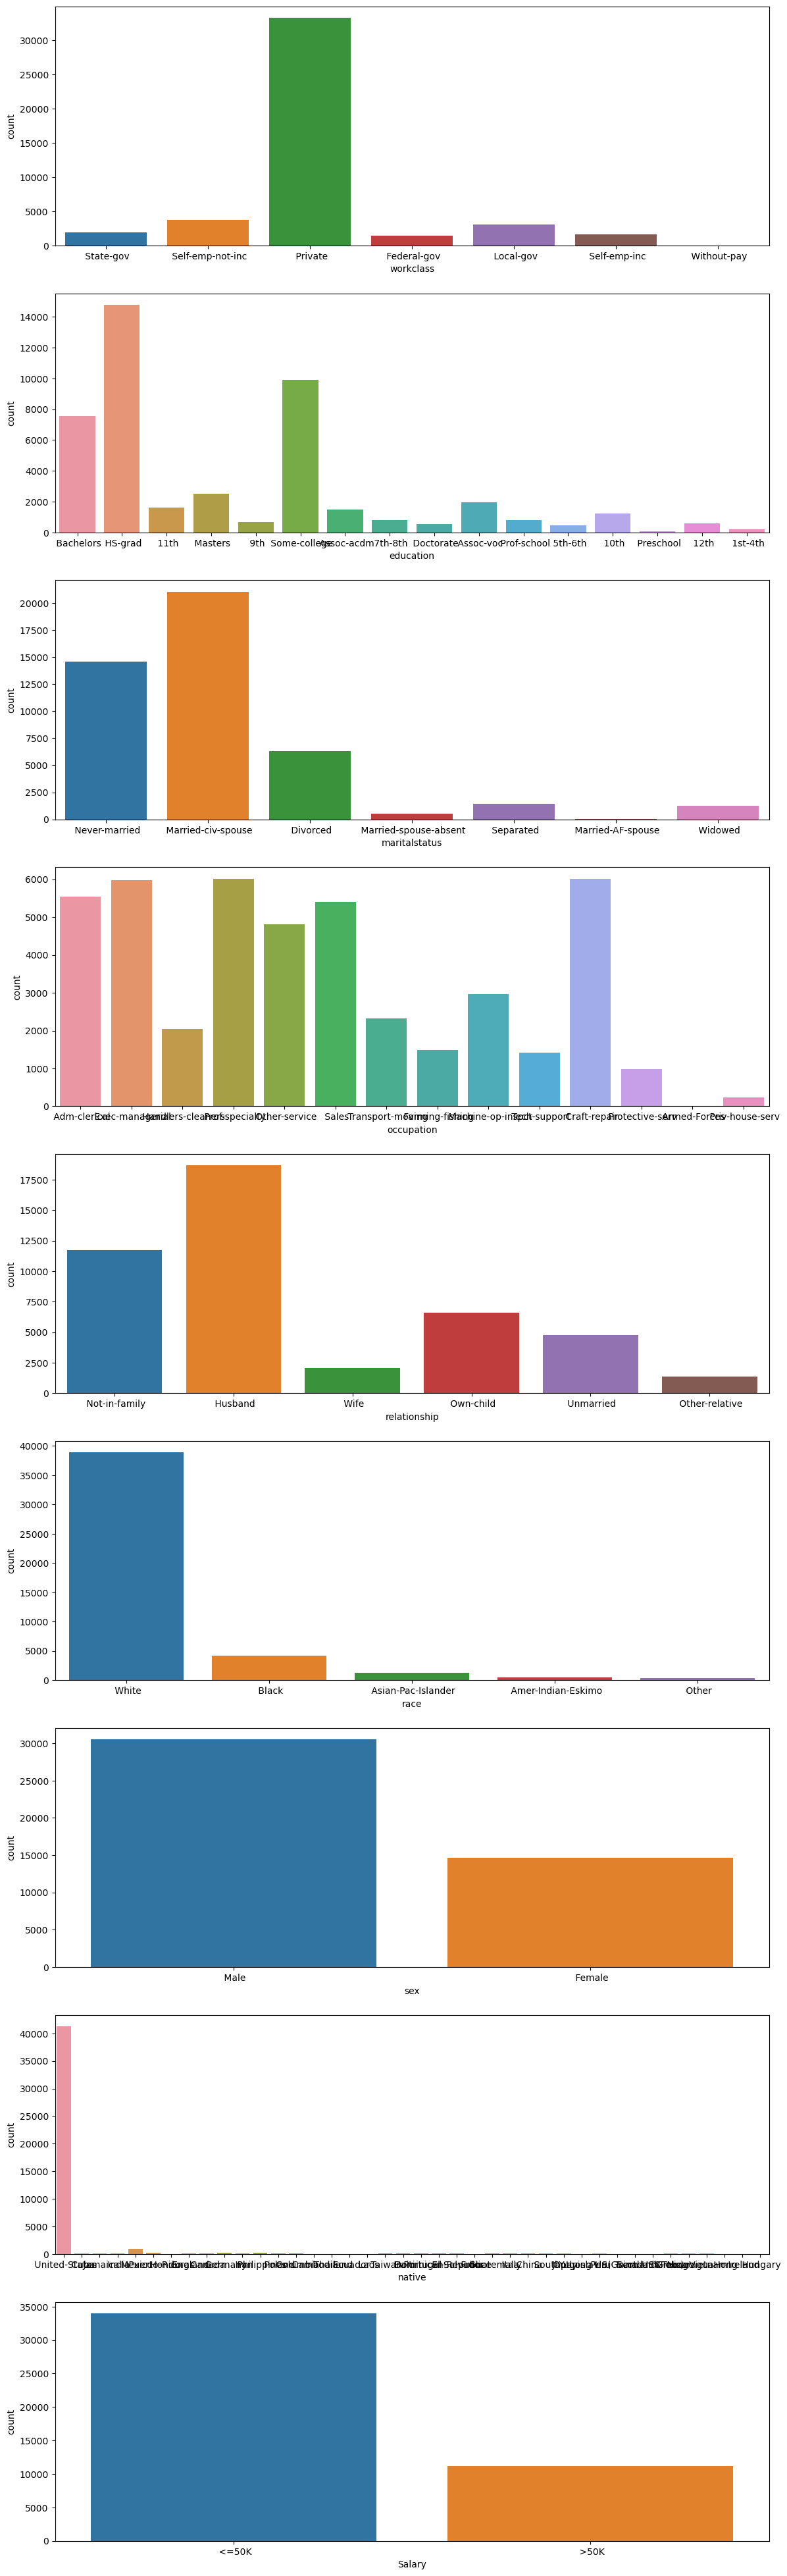

In [24]:
# for categorical_features -- barplot
fig, ax=plt.subplots(9,1,figsize=(14,50))
sns.countplot(x="workclass",data=salary,ax=ax[0])
sns.countplot(x="education",data=salary,ax=ax[1])
sns.countplot(x="maritalstatus",data=salary,ax=ax[2])
sns.countplot(x="occupation",data=salary,ax=ax[3])
sns.countplot(x="relationship",data=salary,ax=ax[4])
sns.countplot(x="race",data=salary,ax=ax[5])
sns.countplot(x="sex",data=salary,ax=ax[6])
sns.countplot(x="native",data=salary,ax=ax[7])
sns.countplot(x="Salary",data=salary,ax=ax[8])
plt.show()

In [25]:
# univarient analysis

In [26]:
salary_more_than_50=pd.DataFrame()
salary_less_than_50=pd.DataFrame()
salary_more_than_50 = salary.loc[salary['Salary']==' >50K']
salary_less_than_50 = salary.loc[salary['Salary']==' <=50K']


In [27]:
salary.shape

(45221, 14)

In [28]:
(salary_less_than_50.shape[0] + salary_more_than_50.shape[0]) ==salary.shape[0] 

True

In [29]:
salary.shape[0]

45221

In [30]:
# Age distribution wrt salary

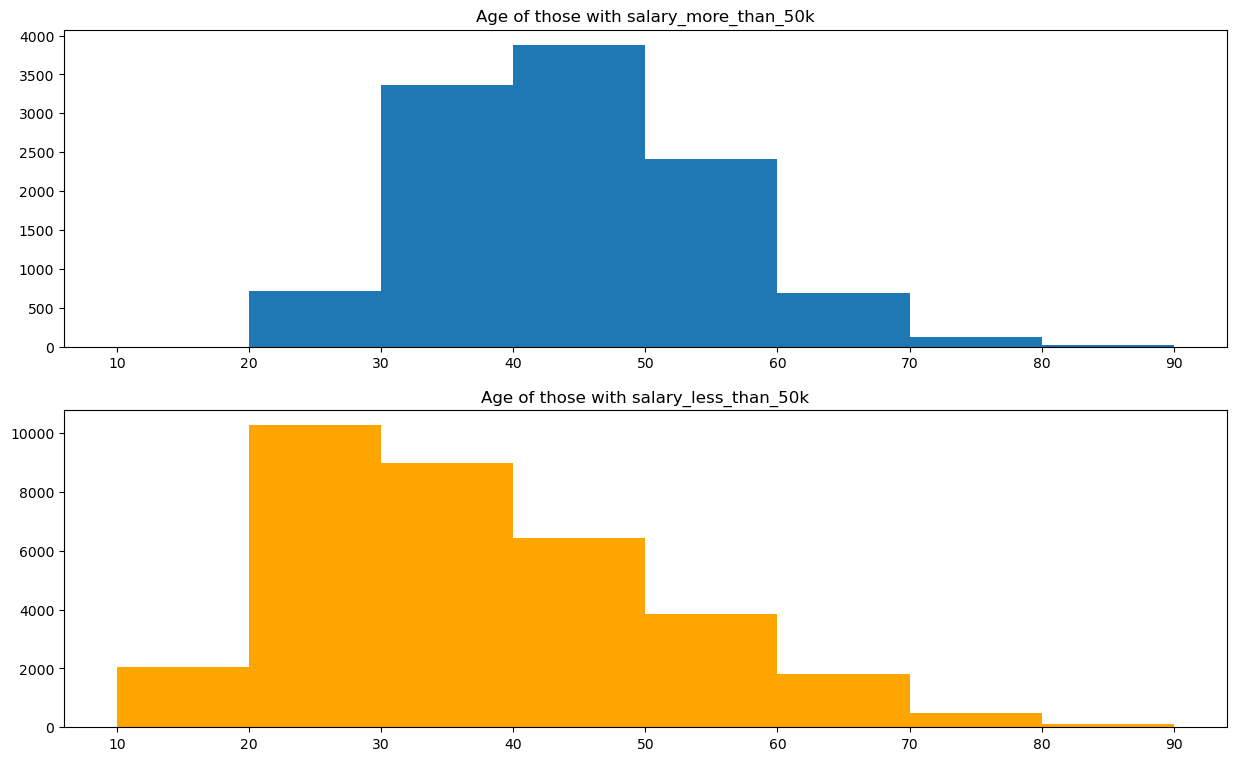

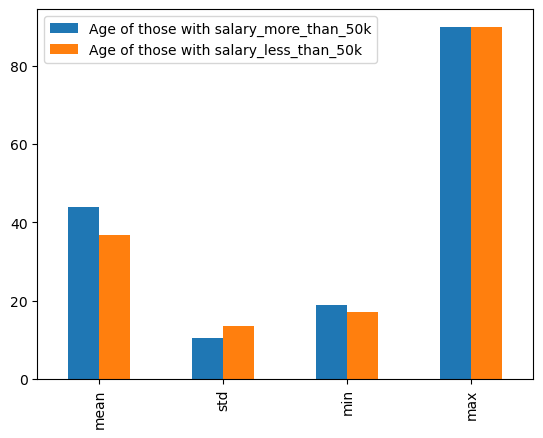

In [31]:
plt.figure(figsize=(15,14))
plt.subplot(3,1,1)
plt.hist(salary_more_than_50.age, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title('Age of those with salary_more_than_50k')
plt.subplot(3,1,2)
plt.hist(salary_less_than_50.age, color = "orange", bins=[10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.title('Age of those with salary_less_than_50k')
age_describe = pd.DataFrame()
age_describe['Age of those with salary_more_than_50k'] = salary_more_than_50['age'].describe()
age_describe['Age of those with salary_less_than_50k'] = salary_less_than_50['age'].describe()
age_describe  = age_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
age_describe.plot.bar()
plt.show()



# inference: age of those with salary more than 50k Most of the people are in the age group of 30 - 50 and no one is below 20yrs
Age of those with salary less than 50K: As age increases, no of people are decreasing.
# house/week distibution with salary

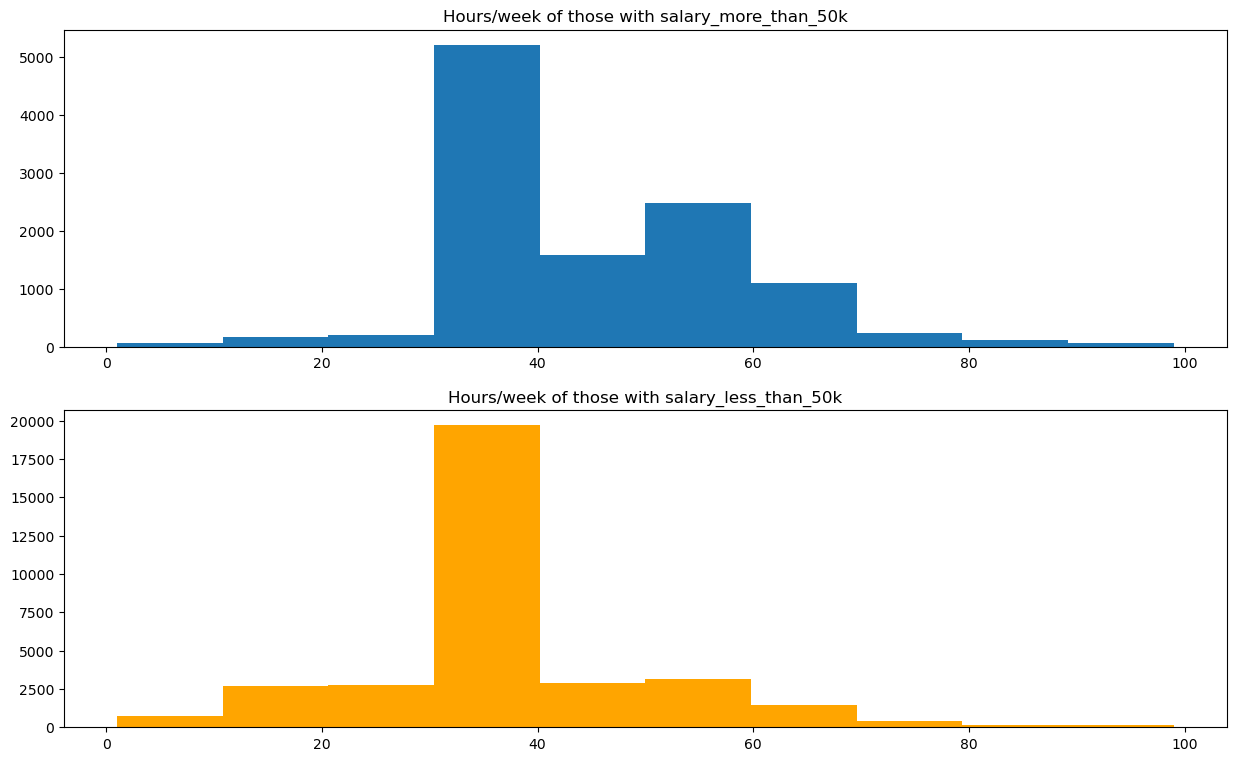

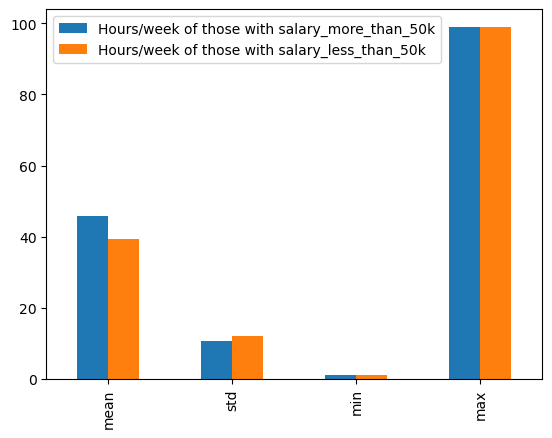

In [32]:
plt.figure(figsize=(15,14))
plt.subplot(3,1,1)
plt.hist(salary_more_than_50.hoursperweek)
plt.title('Hours/week of those with salary_more_than_50k')
plt.subplot(3,1,2)
plt.hist(salary_less_than_50.hoursperweek, color = "orange")
plt.title('Hours/week of those with salary_less_than_50k')
Hoursweek_describe = pd.DataFrame()
Hoursweek_describe['Hours/week of those with salary_more_than_50k'] = salary_more_than_50['hoursperweek'].describe()
Hoursweek_describe['Hours/week of those with salary_less_than_50k'] = salary_less_than_50['hoursperweek'].describe()
Hoursweek_describe = Hoursweek_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
Hoursweek_describe.plot.bar()
plt.show() 

In [34]:
# inference
#For both groups, majority is working for 30 to 40 hrs per week, and people working for 80 to 90 hrs is present in both groups

#**Capital Gains distribution wrt salary**

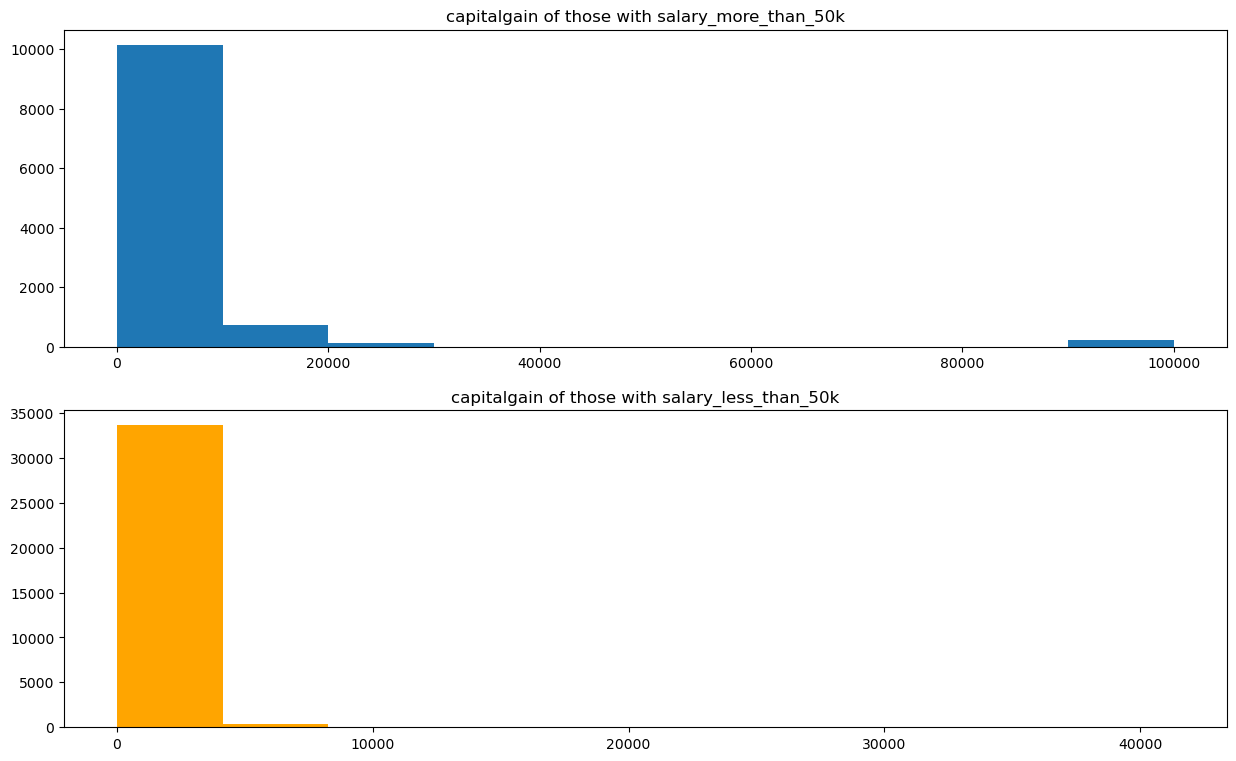

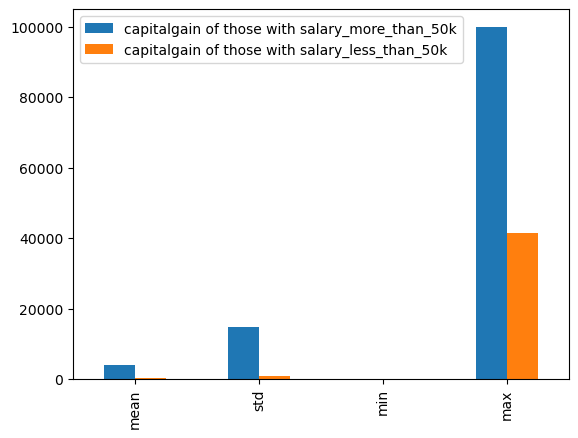

In [35]:
plt.figure(figsize=(15,14))
plt.subplot(3,1,1)
plt.hist(salary_more_than_50.capitalgain)
plt.title('capitalgain of those with salary_more_than_50k')
plt.subplot(3,1,2)
plt.hist(salary_less_than_50.capitalgain, color = "orange")
plt.title('capitalgain of those with salary_less_than_50k')
capitalgain_describe = pd.DataFrame()
capitalgain_describe['capitalgain of those with salary_more_than_50k'] = salary_more_than_50['capitalgain'].describe()
capitalgain_describe['capitalgain of those with salary_less_than_50k'] = salary_less_than_50['capitalgain'].describe()
capitalgain_describe = capitalgain_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
capitalgain_describe.plot.bar()
plt.show() 

# Insight:

Salary more than 50k: Capital gain for majority is between 0 to 1000

Salary less than 50k: capital gain for majority is less than 500

 - Capital Loss distribution wrt salary

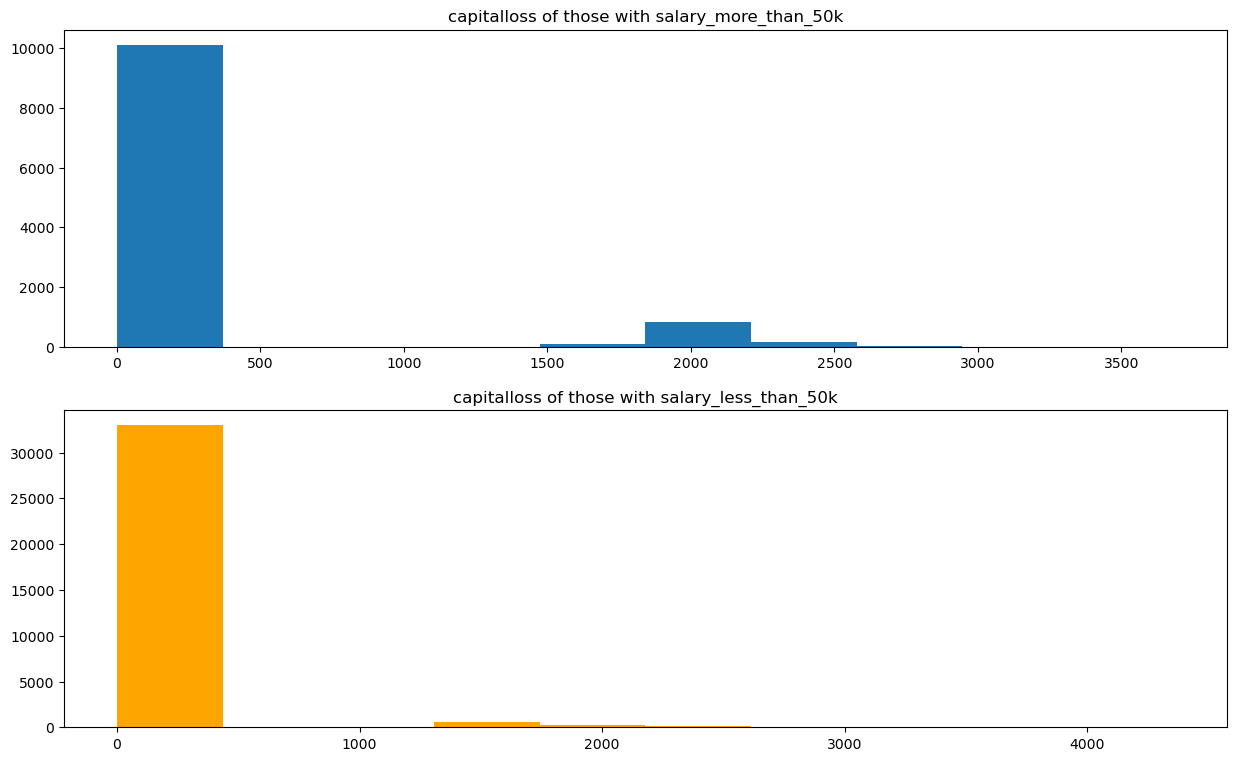

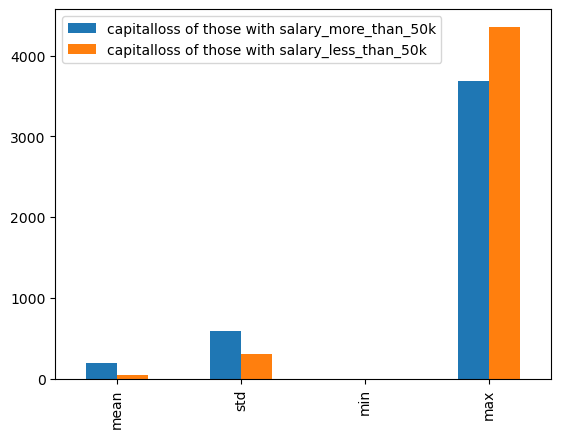

In [36]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(salary_more_than_50.capitalloss)
plt.title('capitalloss of those with salary_more_than_50k')

plt.subplot(3,1,2)
plt.hist(salary_less_than_50.capitalloss, color = "orange")
plt.title('capitalloss of those with salary_less_than_50k')


capitalloss_describe = pd.DataFrame()

capitalloss_describe['capitalloss of those with salary_more_than_50k'] = salary_more_than_50['capitalloss'].describe()
capitalloss_describe['capitalloss of those with salary_less_than_50k'] = salary_less_than_50['capitalloss'].describe()

capitalloss_describe = capitalloss_describe.drop(['count', '25%', '50%', '75%'])
plt.subplot(3,1,2)
capitalloss_describe.plot.bar()

plt.show()

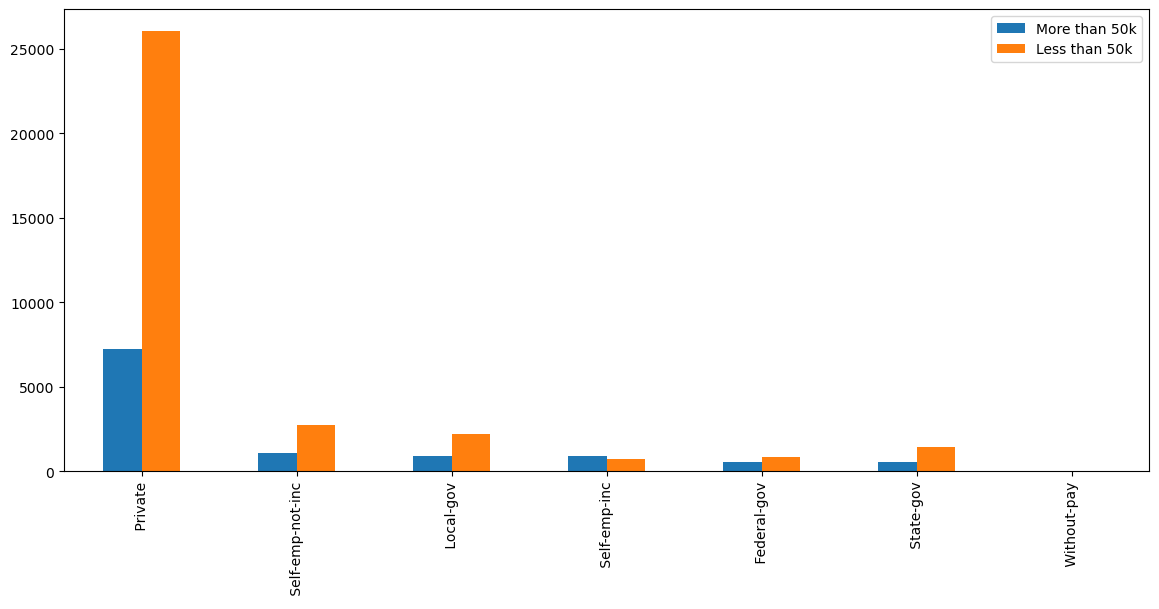

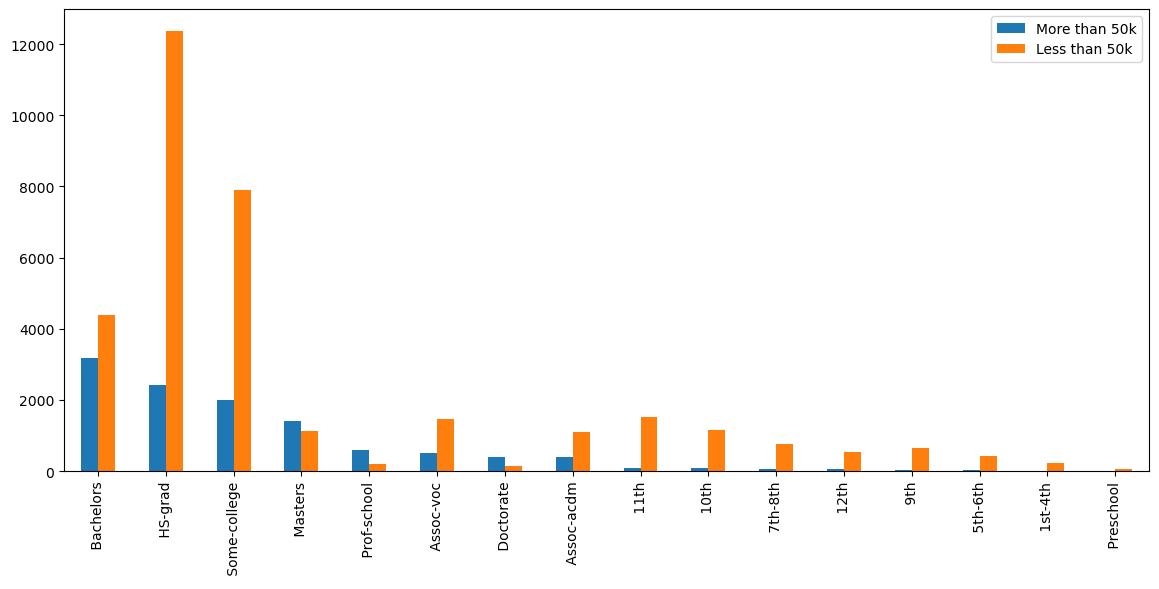

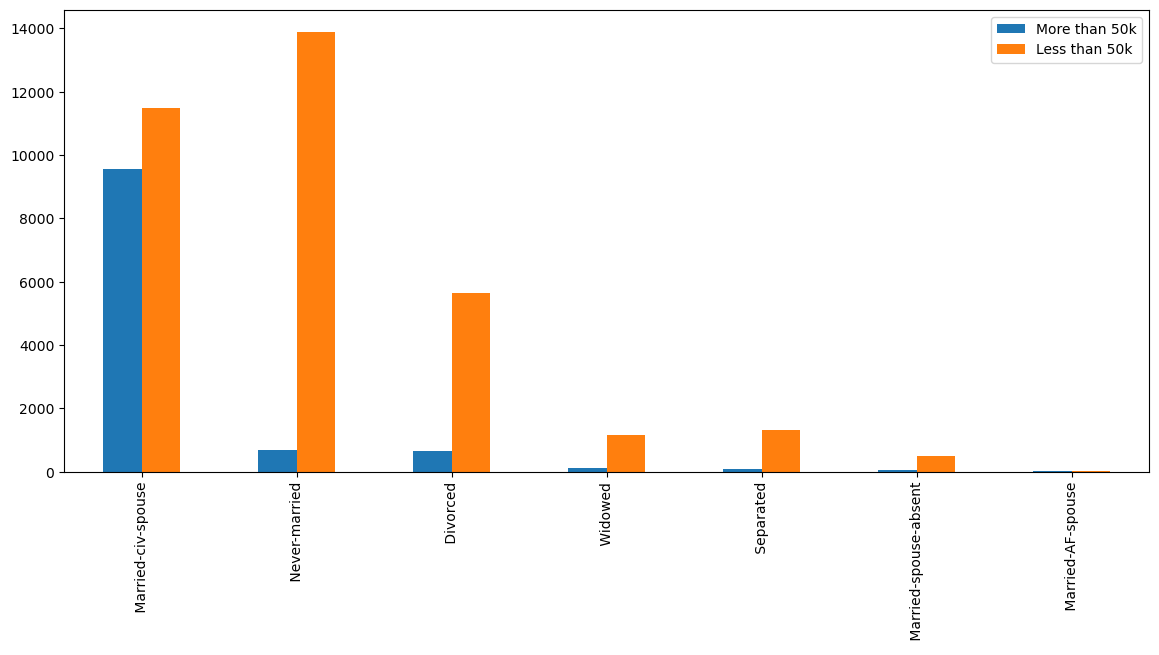

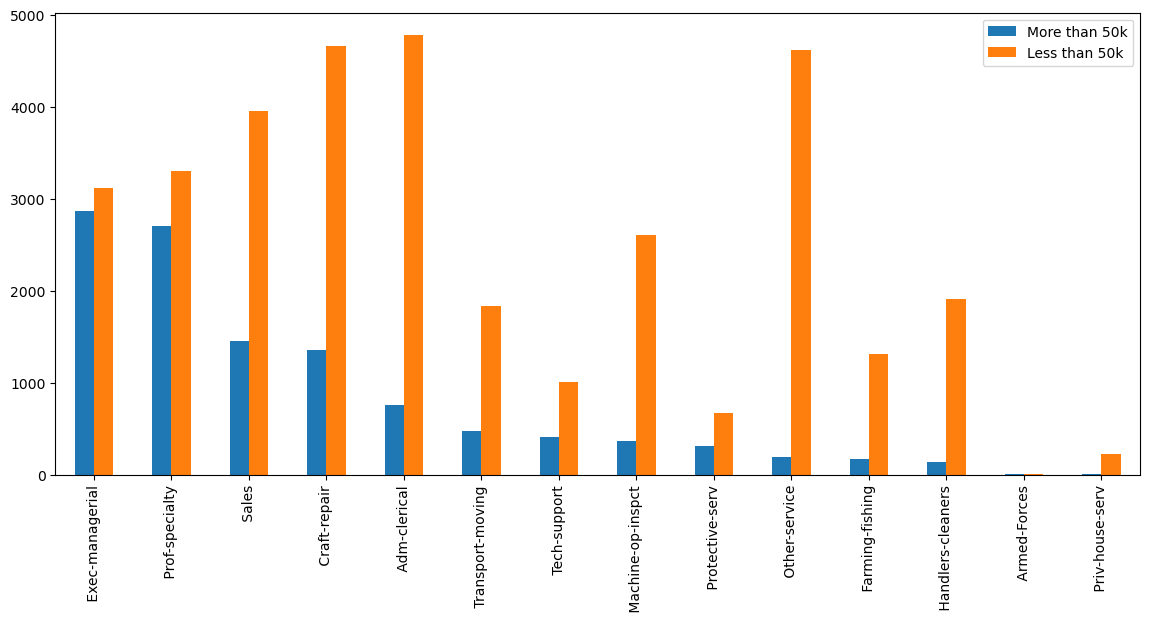

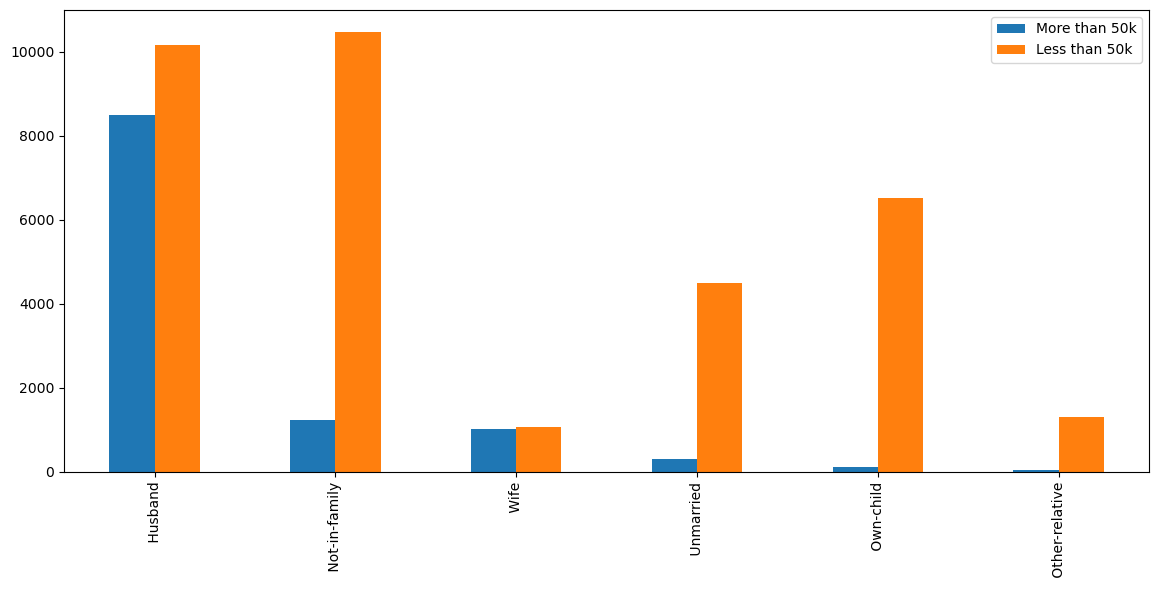

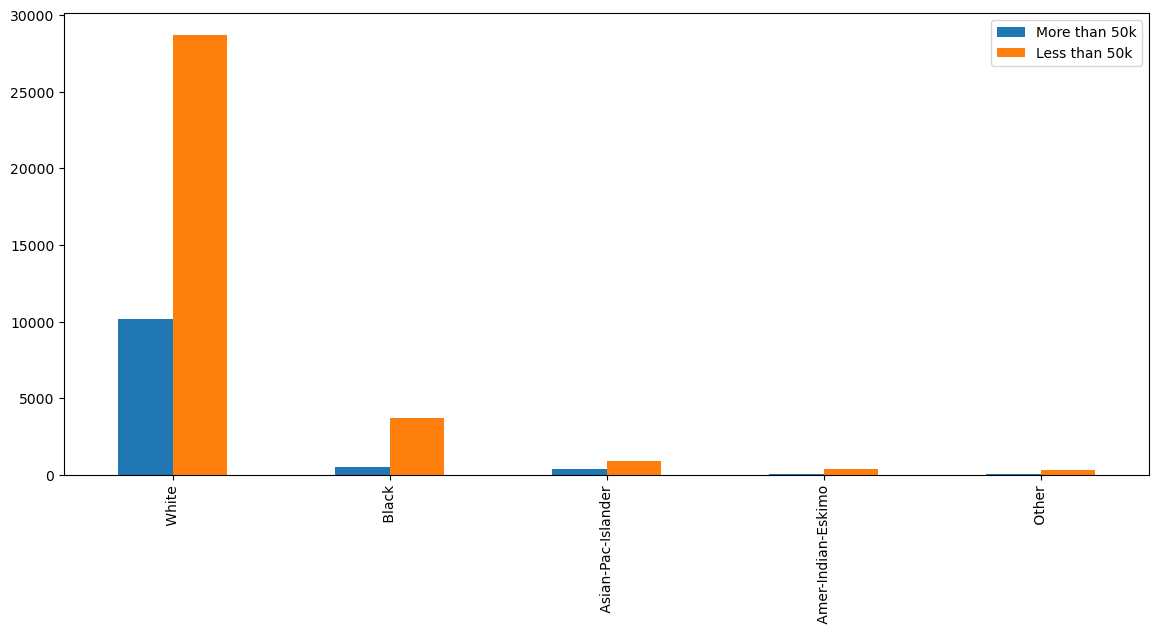

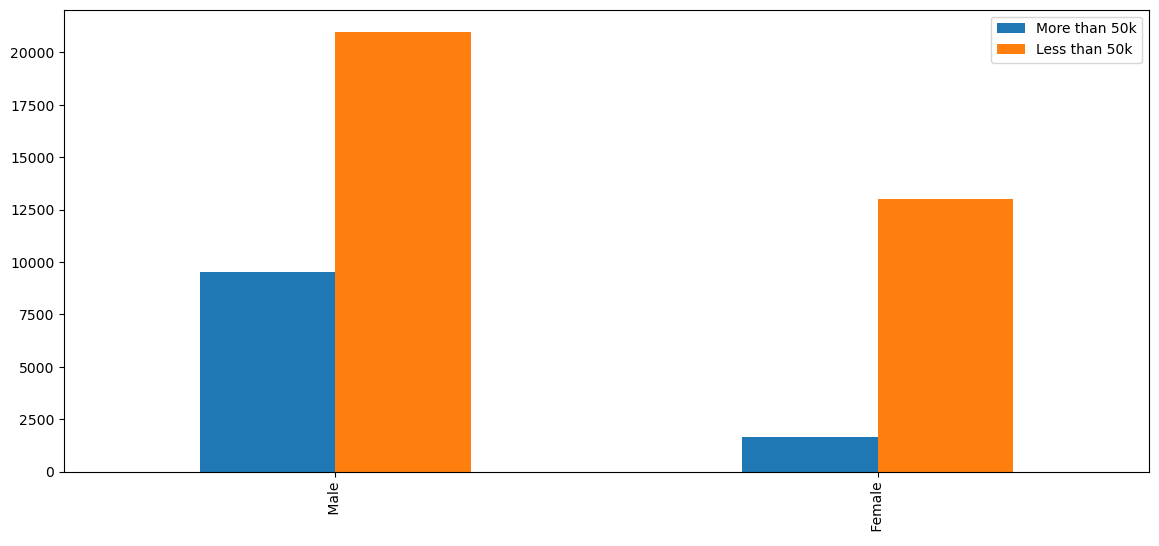

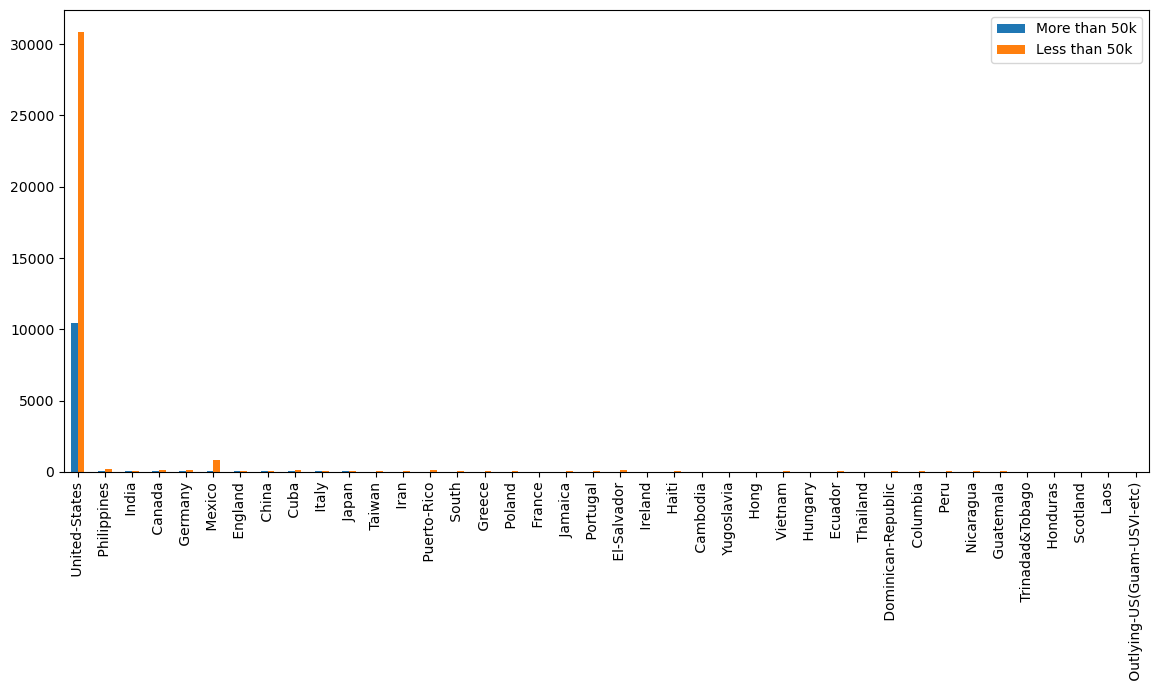

In [37]:
j = 1
categorical_feature.remove('Salary') #removing column salary since it is output variable itself. 

for feature in categorical_feature:
    df = pd.DataFrame()
    df['More than 50k'] = salary[salary['Salary'] == ' >50K'][feature].value_counts()
    df['Less than 50k'] = salary[salary['Salary'] == ' <=50K'][feature].value_counts()
    
    df.plot.bar(figsize=(14,6))
    
    j = j + 1

# Insight:

Majority of both the groups is employed in private sectors

As educational qualification decreases, no. of people in group of 'salary more than 50k' reduces.

Majority of people having salary more than 50k are married, whereas very small proportion of them is never married, divorced, widow, separated. Significant proportion of people having salary less than 50k are never married, divorced, widow, separated.

Most of the people having salary less than 50k are engaged in manual and low skilled work like craft repair, clerk, transport, machine inspection, farming fishing, handlers cleaners and other services. Whereas people having salary more than 50k are in high skilled works like managers, professors, sales

Insignificant amount of non natives are having salary more than 50k

In [38]:
 # Data preprocessing

In [39]:
salary1=salary.copy()
salary1=salary1.drop("Salary",axis=1)

In [40]:
salary1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [41]:
salary1=pd.get_dummies(salary1)
salary1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
salary1['Salary'] = salary.Salary
salary1.head() 
     

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [43]:
encoder=LabelEncoder()
salary1.Salary=encoder.fit_transform(salary.Salary)
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [44]:
#original train dataset
salary_train.shape

(30161, 14)

In [45]:
#original test dataset
salary_test.shape

(15060, 14)

In [46]:
x=salary1.iloc[:30161,:]
y=salary1.iloc[30161:,:]

In [47]:
print("shape of the new dataframe {},{}".format(x.shape,y.shape))

shape of the new dataframe (30161, 103),(15060, 103)


In [48]:
x

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
x_train=x.iloc[:,:102]
x_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
y_train=x.loc[:,["Salary"]]

In [53]:
x_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
x_test=y.iloc[:,:102]

In [55]:
x_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
30161,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30162,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30163,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30164,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30165,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45217,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45218,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45219,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
y_test=y.loc[:,["Salary"]]

In [57]:
y_test

,Salary
30161,0
30162,0
30163,1
30164,1
30165,0
...,...
45216,0
45217,0
45218,0
45219,0


In [62]:
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (30161, 102)
shape of x_test (15060, 102)
shape of y_train (30161, 1)
shape of y_test (15060, 1)


In [ ]:
model=SVC()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred))

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060



<Axes: >

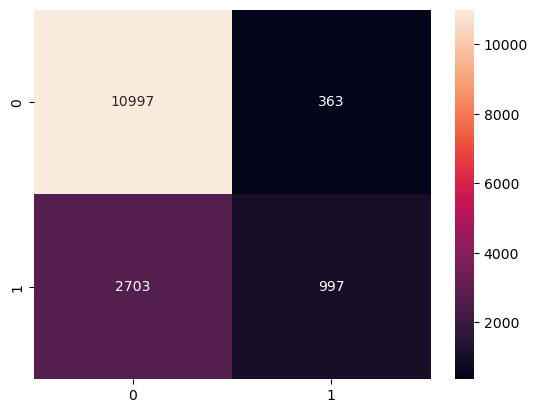

In [61]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')  